In [167]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [168]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [169]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [170]:
X_train.shape

(50000, 32, 32, 3)

In [171]:
y_train.shape

(50000, 1)

In [172]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [173]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [174]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [175]:
def plot_data(X,y,index):
  plt.figure(figsize=(15,5))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

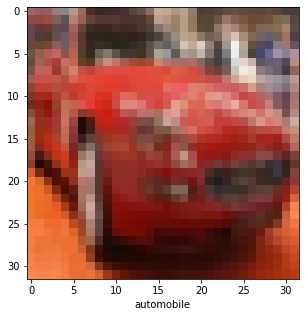

In [176]:
plot_data(X_train,y_train,5)

In [177]:
X_train =X_train/255.0
X_test =X_test/255.0

# ANN

In [178]:
ann =models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')          
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8119 - accuracy: 0.3514
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6221 - accuracy: 0.4283
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5401 - accuracy: 0.4562
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4807 - accuracy: 0.4768
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4304 - accuracy: 0.4946
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3876 - accuracy: 0.5111
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3490 - accuracy: 0.5263
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3146 - accuracy: 0.5395
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2810 - accuracy: 0.5514
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.248

In [179]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.40      0.51      1000
           1       0.75      0.48      0.59      1000
           2       0.36      0.49      0.42      1000
           3       0.44      0.18      0.26      1000
           4       0.47      0.44      0.46      1000
           5       0.35      0.58      0.43      1000
           6       0.58      0.57      0.57      1000
           7       0.47      0.71      0.56      1000
           8       0.63      0.66      0.64      1000
           9       0.62      0.55      0.58      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.50     10000
weighted avg       0.54      0.51      0.50     10000



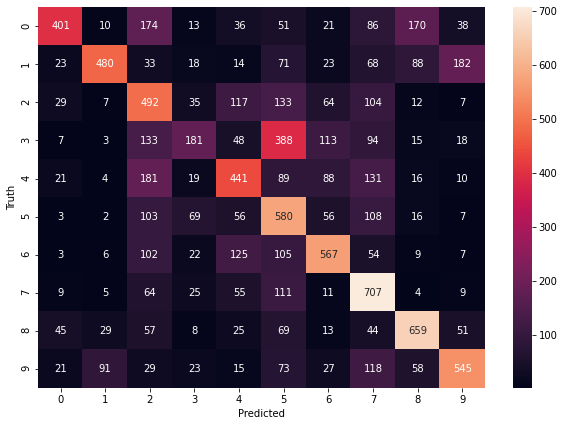

In [180]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

# CNN


In [181]:
cnn = models.Sequential([
            layers.Conv2D(input_shape=(32,32,3),activation='relu',filters=32,kernel_size=(3,3),padding='same',strides=1),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same',strides=1),
            layers.MaxPooling2D((2, 2)),

            layers.Flatten(),
            layers.Dense(64,activation='relu'),
            layers.Dense(10,activation='softmax')
])

In [182]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [183]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.3691 - accuracy: 0.5116
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0148 - accuracy: 0.6442
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8832 - accuracy: 0.6910
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7961 - accuracy: 0.7230
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7285 - accuracy: 0.7463
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6646 - accuracy: 0.7694
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6049 - accuracy: 0.7875
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5512 - accuracy: 0.8063
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5074 - accuracy: 0.8232
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.456

In [184]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9773 - accuracy: 0.6991


[0.9773438572883606, 0.6991000175476074]

In [185]:
y_pred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.77      0.85      0.81      1000
           2       0.54      0.68      0.60      1000
           3       0.51      0.55      0.53      1000
           4       0.69      0.59      0.64      1000
           5       0.64      0.60      0.62      1000
           6       0.84      0.70      0.76      1000
           7       0.81      0.71      0.76      1000
           8       0.81      0.78      0.80      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



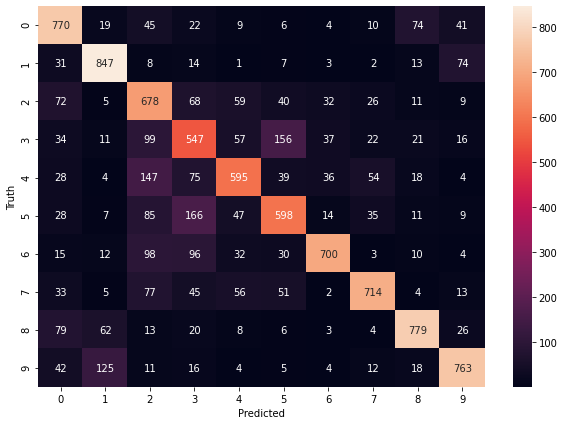

In [186]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_cnn)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print("Classification Report: \n", classification_report(y_test, y_pred_classes_cnn))

# Transfer Learning

In [187]:
import tensorflow_hub as hub

In [188]:
X_train[0].shape

(32, 32, 3)

In [189]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1",input_shape=(32,32,3))
])

In [190]:
predicted = classifier.predict(X_test[:5])
predicted = np.argmax(predicted, axis=1)
predicted

array([3, 8, 8, 0, 6])

In [191]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [192]:
feature_extractor_model = "https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(32, 32, 3), trainable=False)

In [193]:
num_of_classes = 10

trnf_lrn = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 10)                7796426   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 7,796,536
Trainable params: 110
Non-trainable params: 7,796,426
_________________________________________________________________


In [194]:
trnf_lrn.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

trnf_lrn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9358 - accuracy: 0.8308
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0185 - accuracy: 0.9998
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0070 - accuracy: 0.9999
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0034 - accuracy: 0.9999
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 7/10
1563/1563 [==============================] - 13s 9ms/step - loss: 7.4970e-04 - accuracy: 1.0000
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 5.3892e-04 - accuracy: 1.0000
Epoch 9/10
1563/1563 [==============================] - 13s 9ms/step - loss: 4.0694e-04 - accuracy: 1.0000
Epoch 10/10
1563/1563 [==============================] - 14s 

In [195]:
trnf_lrn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2756 - accuracy: 0.9442


[0.2755650281906128, 0.9441999793052673]

In [196]:
y_pred_tf = trnf_lrn.predict(X_test)
y_pred_classes_tf = [np.argmax(element) for element in y_pred_tf]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1000
           1       0.97      0.97      0.97      1000
           2       0.94      0.92      0.93      1000
           3       0.88      0.88      0.88      1000
           4       0.95      0.95      0.95      1000
           5       0.90      0.90      0.90      1000
           6       0.96      0.97      0.96      1000
           7       0.98      0.96      0.97      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



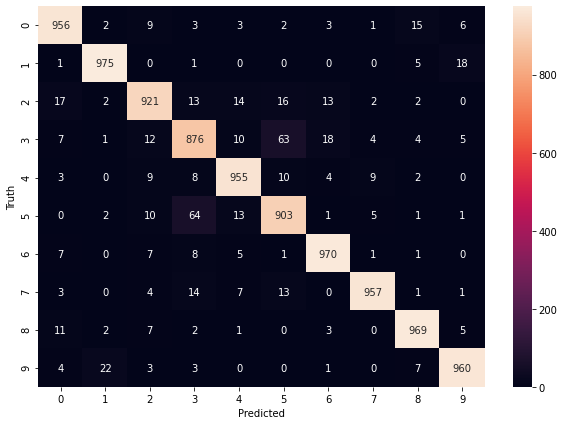

In [197]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes_tf)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print("Classification Report: \n", classification_report(y_test, y_pred_classes_tf))